# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = weather_json["weather"]
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | bologoye
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | saint-augustin
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | jalu
Processing Record 14 of Set 1 | grafing
Processing Record 15 of Set 1 | pimenta bueno
Processing Record 16 of Set 1 | muisne
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | kuyt

Processing Record 36 of Set 4 | los llanos de aridane
Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | asfi
Processing Record 39 of Set 4 | ferrol
Processing Record 40 of Set 4 | mnogovershinnyy
Processing Record 41 of Set 4 | altay
Processing Record 42 of Set 4 | huazolotitlan
City not found. Skipping...
Processing Record 43 of Set 4 | nesna
Processing Record 44 of Set 4 | christchurch
Processing Record 45 of Set 4 | sri aman
Processing Record 46 of Set 4 | sept-iles
Processing Record 47 of Set 4 | kyzyl-suu
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | hue
Processing Record 0 of Set 5 | kieta
Processing Record 1 of Set 5 | pacific grove
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | maragogi
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | ust-kamcha

Processing Record 27 of Set 8 | manjacaze
Processing Record 28 of Set 8 | khonuu
City not found. Skipping...
Processing Record 29 of Set 8 | abu dhabi
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | matiri
Processing Record 32 of Set 8 | suluova
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | ouro preto do oeste
Processing Record 35 of Set 8 | tobane
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | mosquera
Processing Record 38 of Set 8 | puerto del rosario
Processing Record 39 of Set 8 | alim
Processing Record 40 of Set 8 | sanger
Processing Record 41 of Set 8 | coos bay
Processing Record 42 of Set 8 | muravlenko
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | kabinda
Processing Record 45 of Set 8 | bull savanna
Processing Record 46 of Set 8 | yen bai
Processing Record 47 of Set 8 | iqaluit
Processing Record 48 of Set 8 | buala
Processing Record 49 of Set 8 | mercedes
Processing Reco

City not found. Skipping...
Processing Record 16 of Set 12 | nara
Processing Record 17 of Set 12 | ishinomaki
Processing Record 18 of Set 12 | acapulco
Processing Record 19 of Set 12 | yining
Processing Record 20 of Set 12 | oriximina
Processing Record 21 of Set 12 | ouesso
Processing Record 22 of Set 12 | waingapu
Processing Record 23 of Set 12 | beringovskiy
Processing Record 24 of Set 12 | barabinsk
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | vanavara
Processing Record 27 of Set 12 | knin
Processing Record 28 of Set 12 | eugene
Processing Record 29 of Set 12 | visby
Processing Record 30 of Set 12 | eyl
Processing Record 31 of Set 12 | glenwood springs
Processing Record 32 of Set 12 | takoradi
Processing Record 33 of Set 12 | shuangcheng
Processing Record 34 of Set 12 | komsomolskiy
Processing Record 35 of Set 12 | masvingo
Processing Record 36 of Set 12 | arys
Processing Record 37 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 38 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,15.16,95,1,2.62,NA,1675131028
1,bologoye,57.8799,34.1068,-0.83,88,100,5.38,RU,1675131561
2,sitka,57.0531,-135.3300,2.94,93,100,2.06,US,1675131133
3,bathsheba,13.2167,-59.5167,22.34,83,20,3.09,BB,1675130970
4,naze,28.3667,129.4833,13.89,49,1,1.15,JP,1675131141


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,15.16,95,1,2.62,NaN,1675131028
1,bologoye,57.8799,34.1068,-0.83,88,100,5.38,RU,1675131561
2,sitka,57.0531,-135.3300,2.94,93,100,2.06,US,1675131133
3,bathsheba,13.2167,-59.5167,22.34,83,20,3.09,BB,1675130970
4,naze,28.3667,129.4833,13.89,49,1,1.15,JP,1675131141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

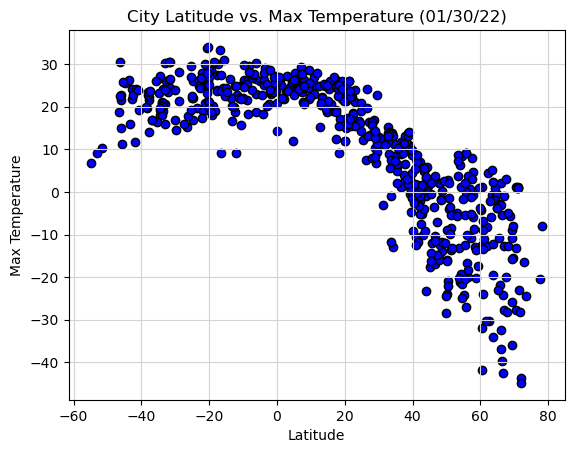

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="blue")

# Set title and axis for plot
plt.title("City Latitude vs. Max Temperature (01/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Set grid
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

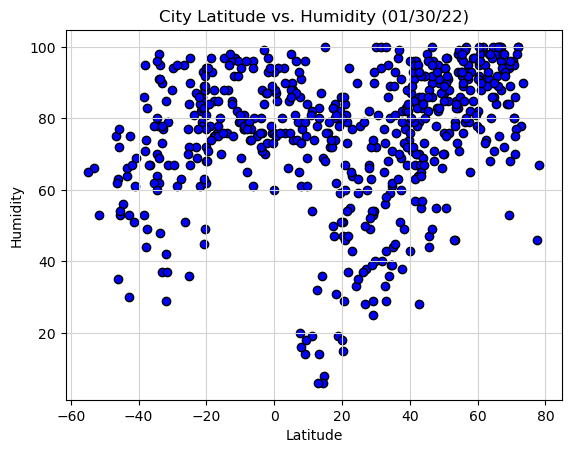

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="blue")

# Set title and axis for plot
plt.title("City Latitude vs. Humidity (01/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Set grid
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

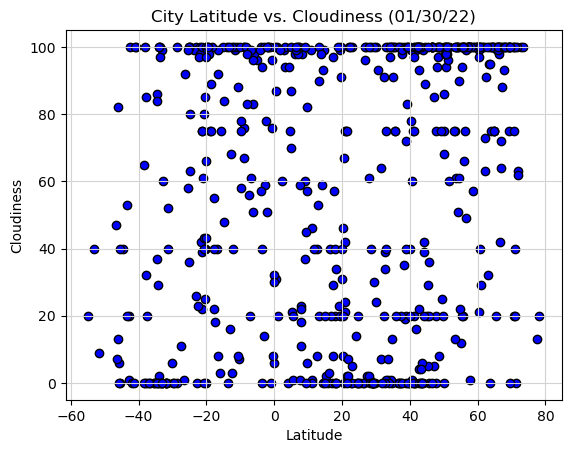

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="blue")

# Set title and axis for plot
plt.title("City Latitude vs. Cloudiness (01/30/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Set grid
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

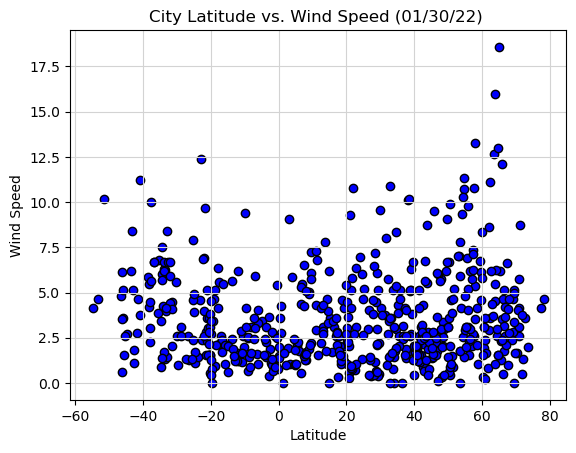

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="blue")

#Set title and axis for plot
plt.title("City Latitude vs. Wind Speed (01/30/22) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Set grid
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel("Latitude")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=14, color="green")
    
    # State r-value
    return print(f"The r- value is: {round(rvalue**2,8)}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bologoye,57.8799,34.1068,-0.83,88,100,5.38,RU,1675131561
2,sitka,57.0531,-135.3300,2.94,93,100,2.06,US,1675131133
3,bathsheba,13.2167,-59.5167,22.34,83,20,3.09,BB,1675130970
4,naze,28.3667,129.4833,13.89,49,1,1.15,JP,1675131141
6,saint-augustin,51.2260,-58.6502,-13.65,91,100,1.51,CA,1675131115


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,15.16,95,1,2.62,NaN,1675131028
5,flinders,-34.5833,150.8552,26.77,70,86,0.89,AU,1675131205
9,viedma,-40.8135,-62.9967,19.14,69,100,11.23,AR,1675131565
12,pimenta bueno,-11.6725,-61.1936,22.69,97,99,1.21,BR,1675131567
15,bluff,-46.6000,168.3333,18.69,75,47,4.78,NZ,1675130976


###  Temperature vs. Latitude Linear Regression Plot

The r- value is: 0.70030631


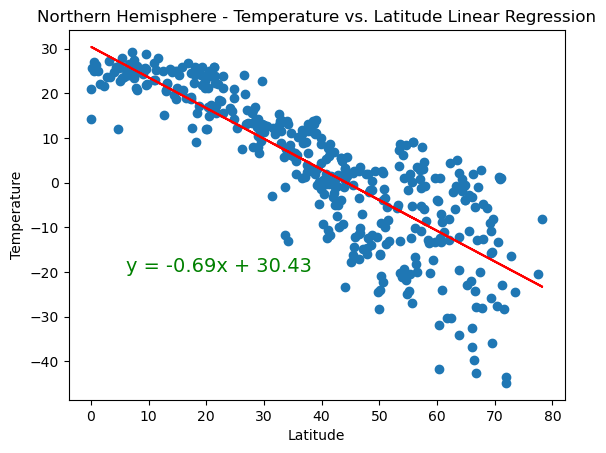

In [18]:
# Linear regression on Northern Hemisphere Temperature vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.ylabel("Temperature")
plot_linear_regression(x_values,y_values,"Max Temp",(6,-20))

# Save graph as png
plt.savefig("output_data/Fig5.png")

plt.show()

The r- value is: 0.11303929


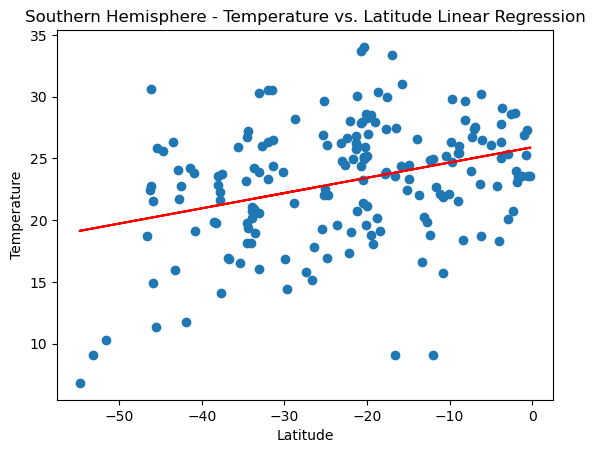

In [19]:
# Linear regression on Southern Hemisphere Temperature vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.ylabel("Temperature")
plot_linear_regression(x_values,y_values,"Max Temp",(-50,90))

# Save graph as png
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** In the lower latitudes of the nothern hemisphere the relationship is very linear. Both the northern and southern hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator, the higher the weather brings more heat.

### Humidity vs. Latitude Linear Regression Plot

The r- value is: 0.14914252


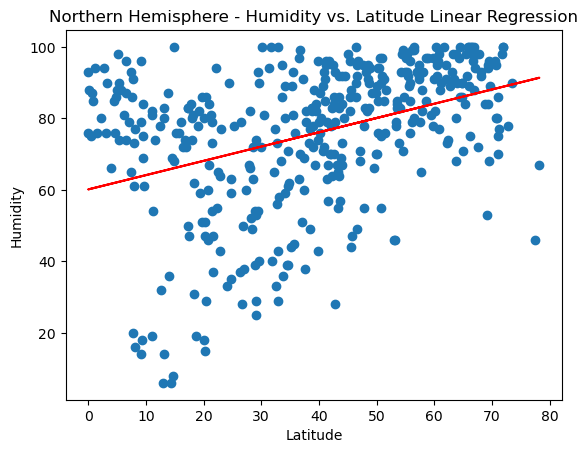

In [20]:
# Linear regression on Northern Hemisphere Humidity vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values,"Humidity",(6,-20))

# Save graph as png
plt.savefig("output_data/Fig7.png")

plt.show()

The r- value is: 0.18166515


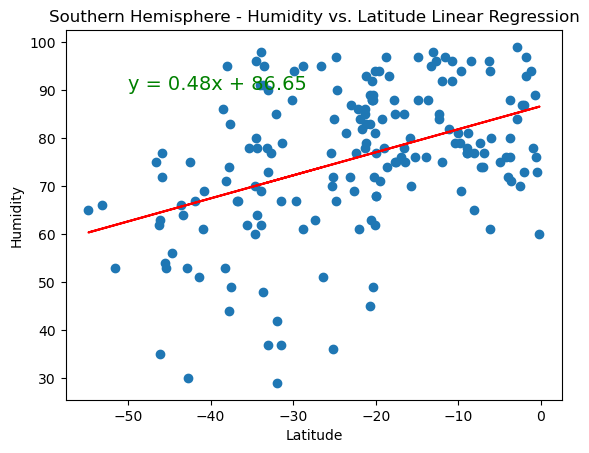

In [21]:
# Linear regression on Southern Hemisphere Humidity vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values,"Humidity",(-50,90))

# Save graph as png
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** The r-squared values show a low value for the regression line. This contradicts the assumption that the relationship between latitude and humidity would be linear.

### Cloudiness vs. Latitude Linear Regression Plot

The r- value is: 0.08894258


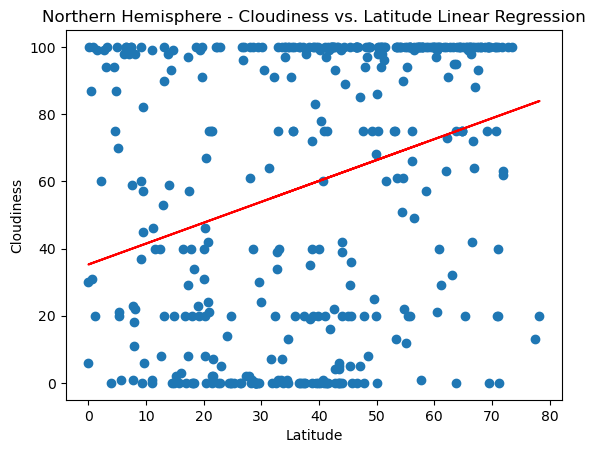

In [22]:
# Linear regression on Northern Hemisphere Cloudiness vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,"Cloudiness",(6,-20))

# Save graph as png
plt.savefig("output_data/Fig9.png")

plt.show()

The r- value is: 0.13628713


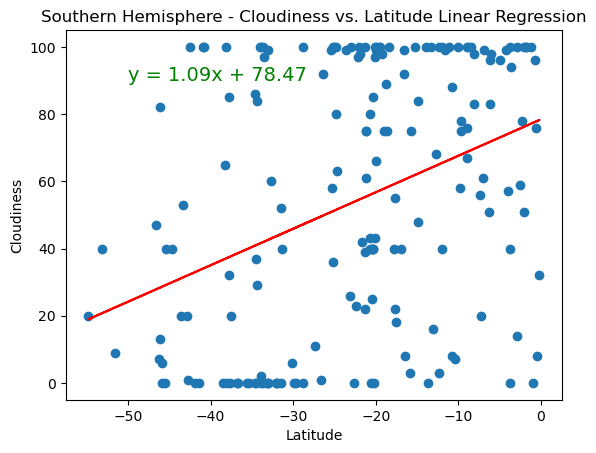

In [23]:
# Linear regression on Southern Hemisphere Cloudiness vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,"Cloudiness",(-50,90))

# Save graph as png
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** This supports there is no linear relationship between the cloudiness and latitude. However, we observe that that northern hemisphere is subjected to more clouds than the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r- value is: 0.02871363


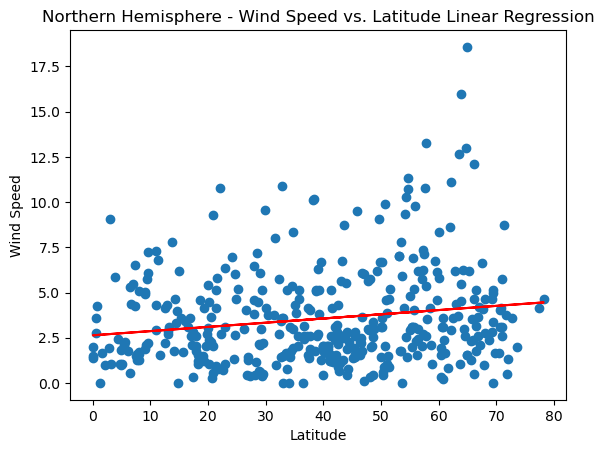

In [24]:
# Linear regression on Northern Hemisphere Wind Speed vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))

# Save graph as png
plt.savefig("output_data/Fig11")

plt.show()

The r- value is: 0.13628713


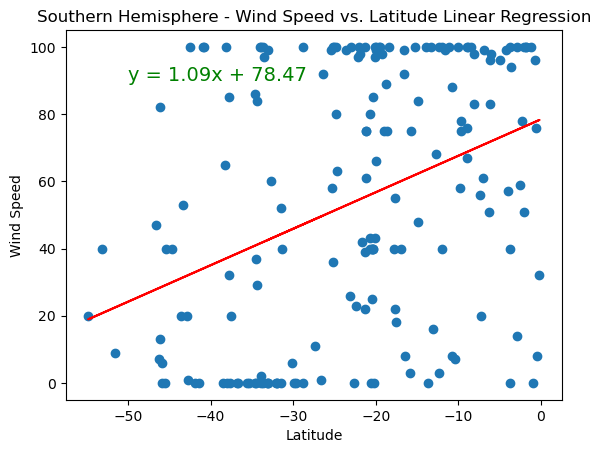

In [26]:
# Linear regression on Southern Hemisphere Wind Speed vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values,"Wind Speed",(-50,90))

# Save graph as png
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** This demonstrates that there is a slight correlation between wind speed and latitude in the northern hemisphere. However, it seems that the data is very spread out for both and not well represented by a linear relationship.